In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load csv file
df = pd.read_csv(r"KNN_data.csv")
classes = df['class']
features = features = df.drop('class', axis=1)


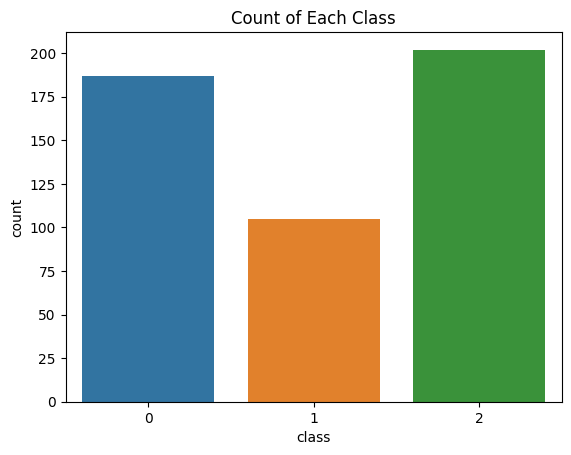

<Figure size 640x480 with 0 Axes>

In [3]:
sns.countplot(x='class', data=df)
plt.title("Count of Each Class")
plt.show()
plt.savefig("countofeachclass.png")


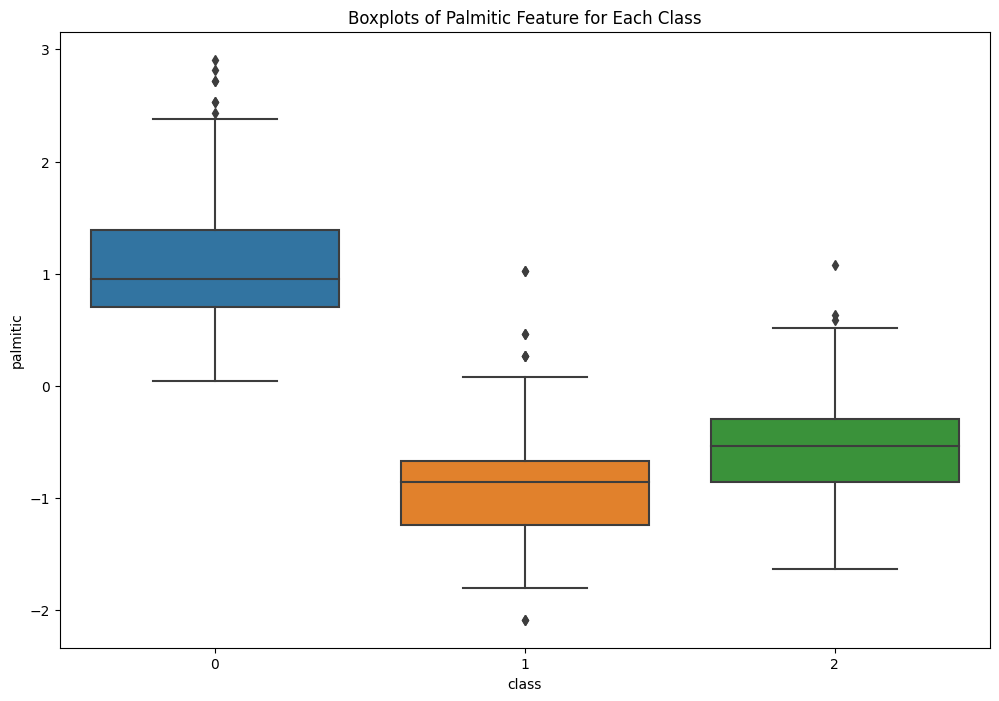

In [4]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='class', y='palmitic')
plt.title("Boxplots of Palmitic Feature for Each Class")
plt.show()


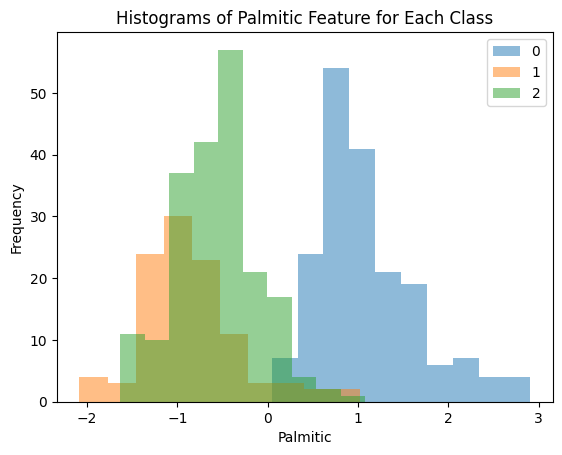

In [5]:
df.groupby('class')['palmitic'].plot(kind='hist', alpha=0.5, legend=True)
plt.title("Histograms of Palmitic Feature for Each Class")
plt.xlabel("Palmitic")
plt.show()


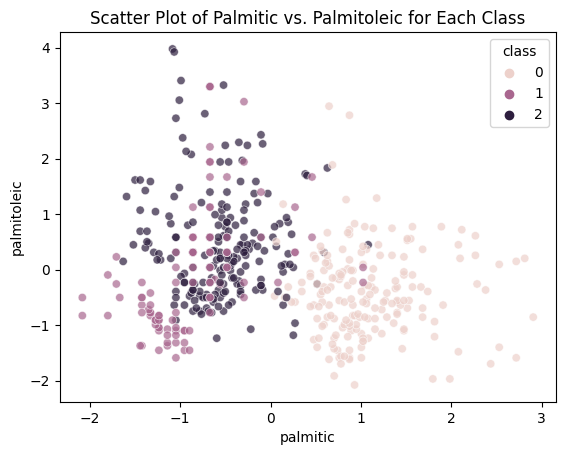

In [6]:
sns.scatterplot(data=df, x='palmitic', y='palmitoleic', hue='class', alpha=0.7)
plt.title("Scatter Plot of Palmitic vs. Palmitoleic for Each Class")
plt.show()


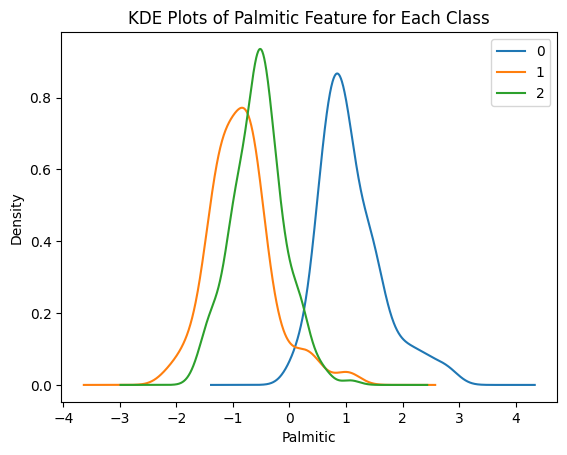

In [7]:
df.groupby('class')['palmitic'].plot(kind='kde', legend=True)
plt.title("KDE Plots of Palmitic Feature for Each Class")
plt.xlabel("Palmitic")
plt.show()


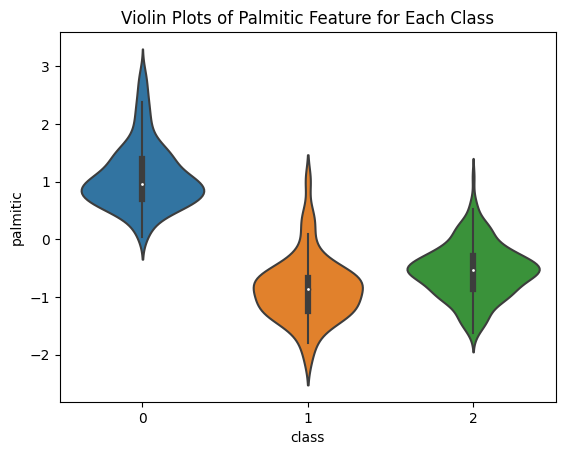

In [8]:
sns.violinplot(data=df, x='class', y='palmitic')
plt.title("Violin Plots of Palmitic Feature for Each Class")
plt.show()


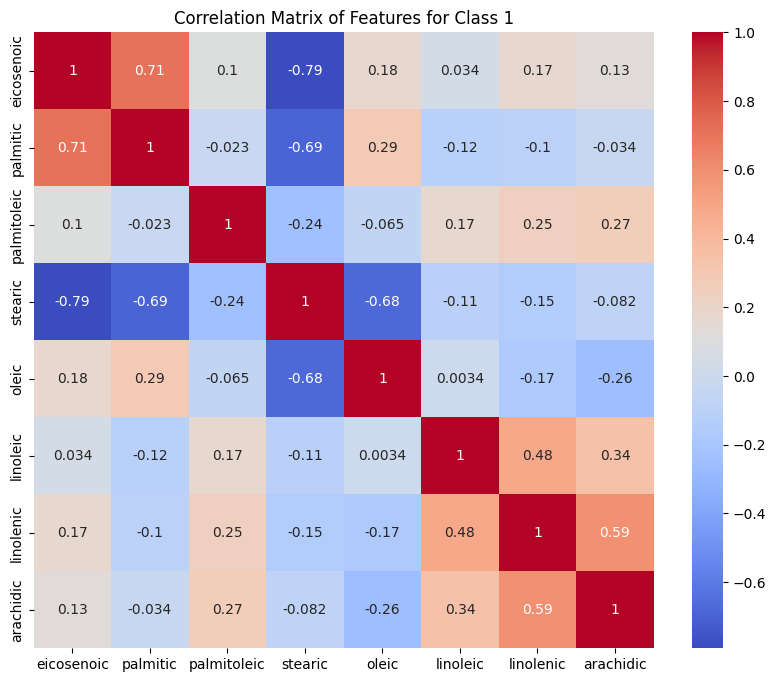

In [9]:
# Assuming 'data_with_class' is your DataFrame containing the filtered data with the 'class' column
class1_data = df[df['class'] == 0].drop('class', axis=1)
correlation_matrix_class1 = class1_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_class1, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features for Class 1")
plt.savefig("correlation_matrix_class1.png")
plt.show()



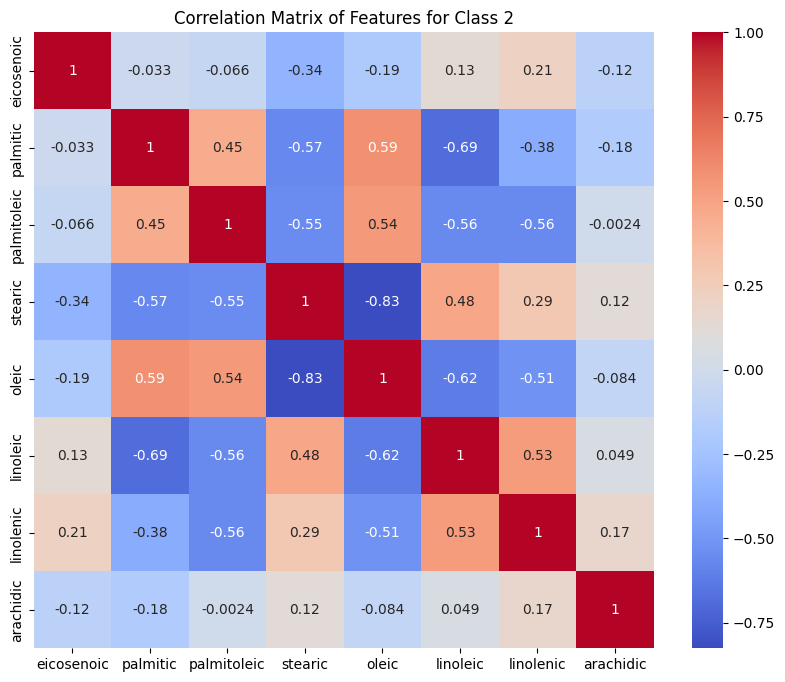

In [10]:
# Assuming 'data_with_class' is your DataFrame containing the filtered data with the 'class' column
class1_data = df[df['class'] == 1].drop('class', axis=1)
correlation_matrix_class1 = class1_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_class1, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features for Class 2")
plt.savefig("correlation_matrix_class2.png")
plt.show()



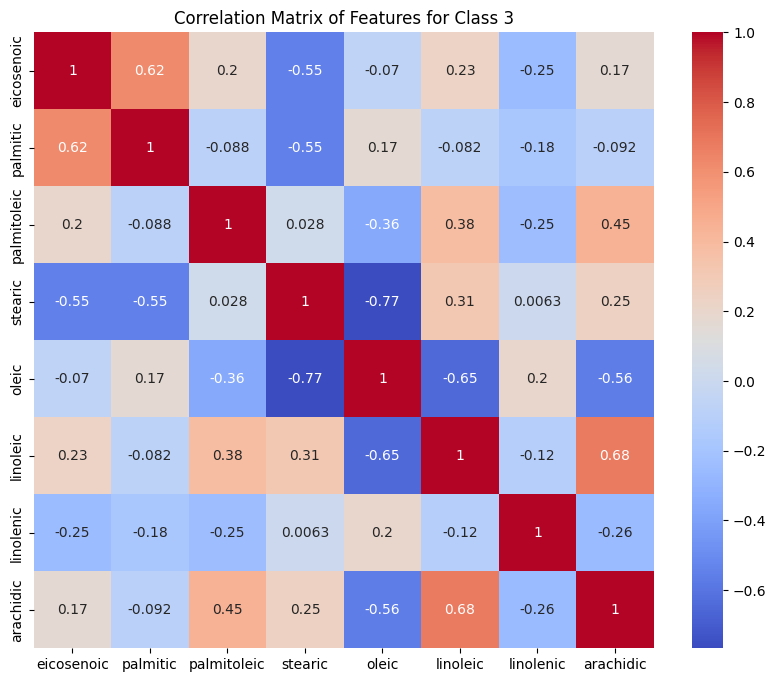

In [11]:
# Assuming 'data_with_class' is your DataFrame containing the filtered data with the 'class' column
class1_data = df[df['class'] == 2].drop('class', axis=1)
correlation_matrix_class1 = class1_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_class1, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features for Class 3")
plt.savefig("correlation_matrix_class3.png")
plt.show()



In [12]:
feature_columns = features.columns

for i, feature in enumerate(feature_columns):
    plt.figure()
    df.groupby('class')[feature].plot(kind='kde', legend=True)
    plt.title(f"KDE Plots of {feature} Feature for Each Class")
    plt.xlabel(feature)
    
    plt.savefig(f"KDE_plot_{feature}.png")
    plt.close()


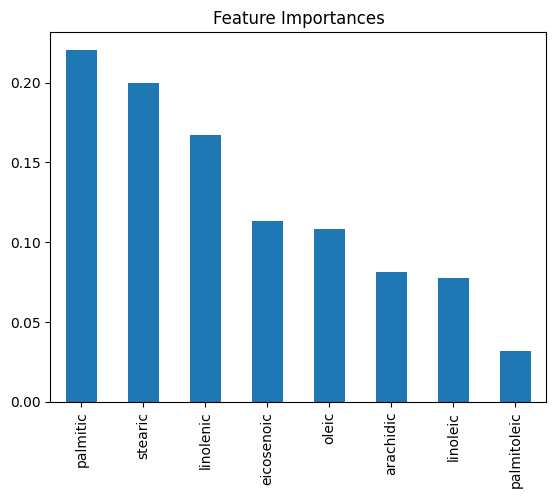

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(features, classes)

importances = pd.Series(rf.feature_importances_, index=features.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importances")
plt.savefig("feature_importances.png")
plt.show()



In [14]:
from scipy.stats import f_oneway

# One-way ANOVA test for the 'palmitic' feature
f_statistic, p_value = f_oneway(*(df[df['class'] == c]['palmitic'] for c in df['class'].unique()))
print(f"F-statistic: {f_statistic}, p-value: {p_value}")


F-statistic: 660.7166117480697, p-value: 5.717178301409357e-140


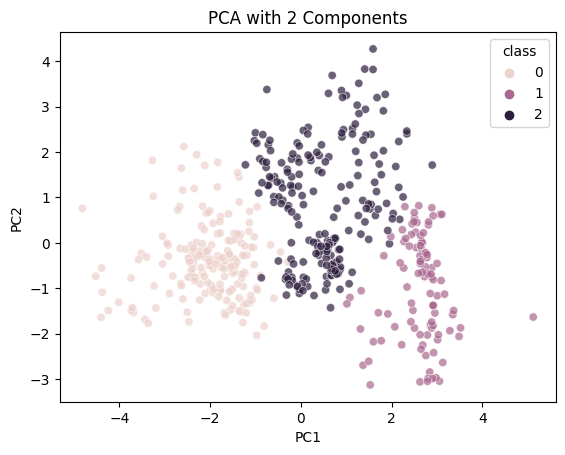

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(features)

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['class'] = classes

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='class', alpha=0.7)
plt.title("PCA with 2 Components")
plt.savefig("PCAwith2components.png")
plt.show()


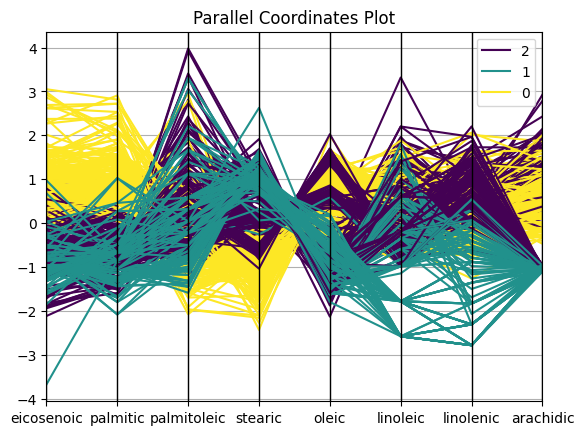

In [16]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, 'class', colormap='viridis')
plt.title("Parallel Coordinates Plot")
plt.show()


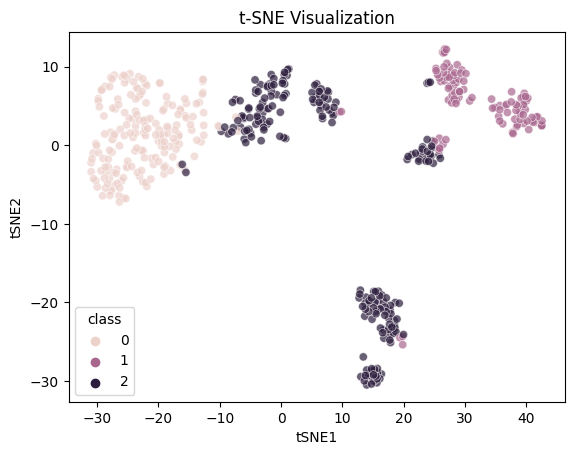

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(features)

tsne_df = pd.DataFrame(tsne_data, columns=['tSNE1', 'tSNE2'])
tsne_df['class'] = classes

sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', hue='class', alpha=0.7)
plt.title("t-SNE Visualization")
plt.savefig("tsne.png")
plt.show()


In [18]:
df.describe()

,eicosenoic,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,class
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,0.004742,0.002043,0.008903,-0.004258,-0.000978,0.023150,0.011963,0.018273,1.030364
std,1.001937,0.997630,1.008828,1.000162,1.001865,1.002386,1.002079,1.002686,0.887763
min,-3.680002,-2.084448,-2.079525,-2.436099,-2.133513,-2.582859,-2.785591,-1.110012,0.000000
25%,-0.815601,-0.761120,-0.660176,-0.780429,-0.867052,-0.430602,-0.398998,-1.039226,0.000000
50%,-0.109068,-0.294894,-0.123676,0.008128,0.193928,0.047678,0.159061,0.093358,1.000000
75%,0.754962,0.816513,0.501109,0.940005,0.836822,0.685383,0.539017,0.801223,2.000000
max,3.049721,2.907465,3.978174,2.625059,2.024956,3.315920,2.201321,2.924817,2.000000
